<center>
<h1>Deep autoencoders</h1>
    <h2>Made with ❤️ by Emilio Pomares Porras (@emiliothehuman)</h2>
    <h3>Con datos facilitados por Olivetti Research Laboratory</h3>
    </center>
<br><img src="https://lilianweng.github.io/lil-log/assets/images/autoencoder-architecture.png">
<br><br>Usaremos un deep autoencoder para obtener embeddings de caras humanas

In [1]:
# Imports usuales

import tensorflow as tf
import tensorflow.contrib.keras as keras
import numpy as np
L = keras.layers
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import zipfile

def readImagesFromZipfile(filepath):
    imdata = []
    zfile = zipfile.ZipFile(filepath)
    for finfo in zfile.infolist():
        fname = finfo.filename
        if(fname.startswith("_")==False and fname.startswith(".")==False and fname.endswith("pgm")==True):
            print("Attempting ",fname)
            handle = zfile.open(finfo)
            image = Image.open(handle).resize((32, 48))
            imdata.append(image)
    return imdata


In [3]:
# Carga todas las imágenes almacenadas en el archivo zip

images = readImagesFromZipfile("./orl_faces.zip")

Attempting  orl_faces/s34/7.pgm
Attempting  orl_faces/s34/6.pgm
Attempting  orl_faces/s34/4.pgm
Attempting  orl_faces/s34/5.pgm
Attempting  orl_faces/s34/1.pgm
Attempting  orl_faces/s34/2.pgm
Attempting  orl_faces/s34/3.pgm
Attempting  orl_faces/s34/8.pgm
Attempting  orl_faces/s34/9.pgm
Attempting  orl_faces/s34/10.pgm
Attempting  orl_faces/s33/7.pgm
Attempting  orl_faces/s33/6.pgm
Attempting  orl_faces/s33/4.pgm
Attempting  orl_faces/s33/5.pgm
Attempting  orl_faces/s33/1.pgm
Attempting  orl_faces/s33/2.pgm
Attempting  orl_faces/s33/3.pgm
Attempting  orl_faces/s33/8.pgm
Attempting  orl_faces/s33/9.pgm
Attempting  orl_faces/s33/10.pgm
Attempting  orl_faces/s5/7.pgm
Attempting  orl_faces/s5/6.pgm
Attempting  orl_faces/s5/4.pgm
Attempting  orl_faces/s5/5.pgm
Attempting  orl_faces/s5/1.pgm
Attempting  orl_faces/s5/2.pgm
Attempting  orl_faces/s5/3.pgm
Attempting  orl_faces/s5/8.pgm
Attempting  orl_faces/s5/9.pgm
Attempting  orl_faces/s5/10.pgm
Attempting  orl_faces/s2/7.pgm
Attempting  orl_

Attempting  orl_faces/s31/7.pgm
Attempting  orl_faces/s31/6.pgm
Attempting  orl_faces/s31/4.pgm
Attempting  orl_faces/s31/5.pgm
Attempting  orl_faces/s31/1.pgm
Attempting  orl_faces/s31/2.pgm
Attempting  orl_faces/s31/3.pgm
Attempting  orl_faces/s31/8.pgm
Attempting  orl_faces/s31/9.pgm
Attempting  orl_faces/s31/10.pgm
Attempting  orl_faces/s38/7.pgm
Attempting  orl_faces/s38/6.pgm
Attempting  orl_faces/s38/4.pgm
Attempting  orl_faces/s38/5.pgm
Attempting  orl_faces/s38/1.pgm
Attempting  orl_faces/s38/2.pgm
Attempting  orl_faces/s38/3.pgm
Attempting  orl_faces/s38/8.pgm
Attempting  orl_faces/s38/9.pgm
Attempting  orl_faces/s38/10.pgm
Attempting  orl_faces/s22/7.pgm
Attempting  orl_faces/s22/6.pgm
Attempting  orl_faces/s22/4.pgm
Attempting  orl_faces/s22/5.pgm
Attempting  orl_faces/s22/1.pgm
Attempting  orl_faces/s22/2.pgm
Attempting  orl_faces/s22/3.pgm
Attempting  orl_faces/s22/8.pgm
Attempting  orl_faces/s22/9.pgm
Attempting  orl_faces/s22/10.pgm
Attempting  orl_faces/s25/7.pgm
Attem

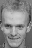

In [4]:
images[27]

In [5]:
NPixels = 32*48

inputs = L.Input(shape=(NPixels,))
#codeInputs = Input(shape=(128,))

e = L.Dense(512, activation='elu')(inputs)
#e = L.Dropout(0.5)(e)
e = L.Dense(256, activation='elu')(e)
#e = L.Dropout(0.5)(e)
code = L.Dense(128, activation='elu')(e)

codeInputs = L.Input(shape=(128,))
d = L.Dense(256, activation='elu')(code)
#d = L.Dropout(0.5)(d)
d = L.Dense(512, activation='elu')(d)
#d = L.Dropout(0.5)(d)
decode = L.Dense(NPixels)(d)

model = keras.models.Model(inputs = inputs, outputs = decode)
encoder = keras.models.Model(inputs = inputs, outputs = code)
decoder = keras.models.Model(inputs = codeInputs, outputs = model.layers[-1](model.layers[-2](model.layers[-3](codeInputs))))

In [6]:
def ImagesToTrainset(imgs):
    trainset = []
    for im in imgs:
        trainset.append(np.array(im))
    return np.array(trainset).reshape(len(imgs), NPixels)

In [7]:
def NormalizeImage(imdata):
    return (imdata / 255.0)

def DenormalizeImage(rawdata):
    return np.clip((rawdata * 255.0), a_min = 0, a_max = 255) 

In [8]:
trainset = NormalizeImage(ImagesToTrainset(images))

In [9]:
trainset.shape

(400, 1536)

In [10]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1536)              787968    
Total para

In [12]:
# Definamos una clase descendiente de Callback para almacenar una historia de losses

class LossHistory(keras.callbacks.Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            
        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            
l = LossHistory()

In [13]:
model.fit(trainset, trainset, epochs = 60, callbacks=[l])

Epoch 1/60
400/400 [==============================] - 2s 6ms/step - loss: 0.1071
Epoch 2/60
400/400 [==============================] - 1s 1ms/step - loss: 0.0302
Epoch 3/60
400/400 [==============================] - 1s 1ms/step - loss: 0.0228
Epoch 4/60
400/400 [==============================] - 1s 2ms/step - loss: 0.0202
Epoch 5/60
400/400 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 6/60
400/400 [==============================] - 1s 2ms/step - loss: 0.0169
Epoch 7/60
400/400 [==============================] - 1s 1ms/step - loss: 0.0158
Epoch 8/60
400/400 [==============================] - 1s 1ms/step - loss: 0.0148
Epoch 9/60
400/400 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 10/60
400/400 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 11/60
400/400 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 12/60
400/400 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 13/60
400/400 [====

Text(0.5, 1.0, 'Cost function over time (epochs)')

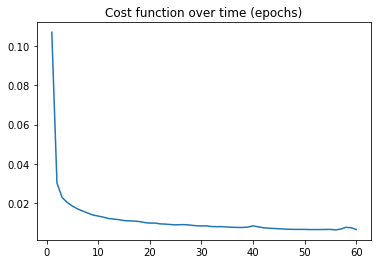

In [14]:
# Echemos un vistazo al coste en función de la época

x = range(1,len(l.losses)+1)
y = l.losses
plt.plot(x,y)
plt.title("Cost function over time (epochs)")

In [15]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
Total params: 951,168
Trainable params: 951,168
Non-trainable params: 0
_________________________________________________________________


In [16]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1536)              787968    
Total params: 952,576
Trainable params: 952,576
Non-trainable params: 0
_________________________________________________________________


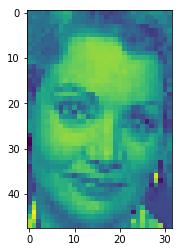

In [17]:
# La representación

ImageZeroCode = encoder.predict(trainset[0:1])
ImageTenCode = encoder.predict(trainset[10:11])
plt.imshow(trainset[51:52].reshape(48,32))

In [18]:
print(ImageZeroCode[0:1])
print(ImageTenCode[0:1])

[[-0.16196513  0.20889275  0.37743363 -0.96851695 -0.31170547 -0.73802626
   0.86124045 -0.8119936  -0.897106   -0.5672533  -0.6106173   0.7299473
   1.879114   -0.96791804 -0.23127878 -0.00474644 -0.6565651  -0.7730849
  -0.73936987 -0.6587683  -0.6097419   0.10058566 -0.6097522   0.30406842
  -0.63470143 -0.3454448  -0.80433255 -0.36114597 -0.07937109 -0.54967594
  -0.5183933   0.9260389  -0.14769304  0.08599854 -0.5146479  -0.8696639
  -0.93113196 -0.5346494   0.4102908  -0.5559882   0.2222514   0.47322303
  -0.6142806   0.18164372 -0.8940326  -0.46008033 -0.3275063  -0.5464461
  -0.9041852  -0.7684397  -0.40396667 -0.47138035 -0.42688704 -0.5145223
   0.20604062 -0.06685287 -0.46801764 -0.5932267  -0.92731243 -0.72147703
  -0.72335327 -0.58067167 -0.73095703 -0.9599975   0.02615692 -0.64988065
  -0.40693784 -0.7989019  -0.56301516 -0.48983693 -0.1338309  -0.8560922
  -0.3985107  -0.92292434 -0.9058076  -0.93727076  0.76410866 -0.4853298
   0.37634784 -0.94905275 -0.5418287  -0.4234

In [19]:
ReconstructedZeroImage = decoder.predict(ImageZeroCode[0:1])
ReconstructedTenImage = decoder.predict(ImageTenCode[0:1])

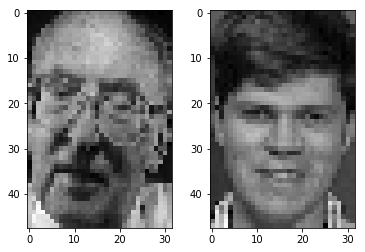

In [20]:
plt.subplot(1,2,1)
plt.imshow(images[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(images[10], cmap='gray')

In [21]:
recImZero = DenormalizeImage(ReconstructedZeroImage)
recImTen = DenormalizeImage(ReconstructedTenImage)

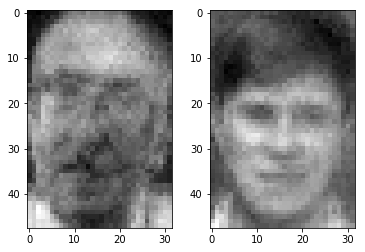

In [22]:
plt.subplot(1,2,1)
plt.imshow(recImZero.reshape(48,32), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(recImTen.reshape(48,32), cmap='gray')

¡Álgebra de caras!
Definamos una cara a medio camino entre las dos anteriores

In [23]:
np.interp(0.5, [1, 2, 3], [4, 5, 6])

4.0

In [43]:
def lerp(arr1, arr2, fraction):
    return np.array(list(map(lambda x: (x[0]+x[1])*fraction, zip(arr1, arr2))))

In [44]:
InterpolatedCode = lerp(ImageZeroCode, ImageTenCode, 0.5)
InterpolatedCode.shape

(1, 128)

In [46]:
ReconstructedInterpolated = decoder.predict(InterpolatedCode[0:1])
recImInterp = DenormalizeImage(ReconstructedInterpolated)

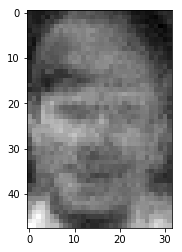

In [47]:
plt.imshow(recImInterp.reshape(48,32), cmap='gray')